FileUpload(value={}, description='Upload CSV')

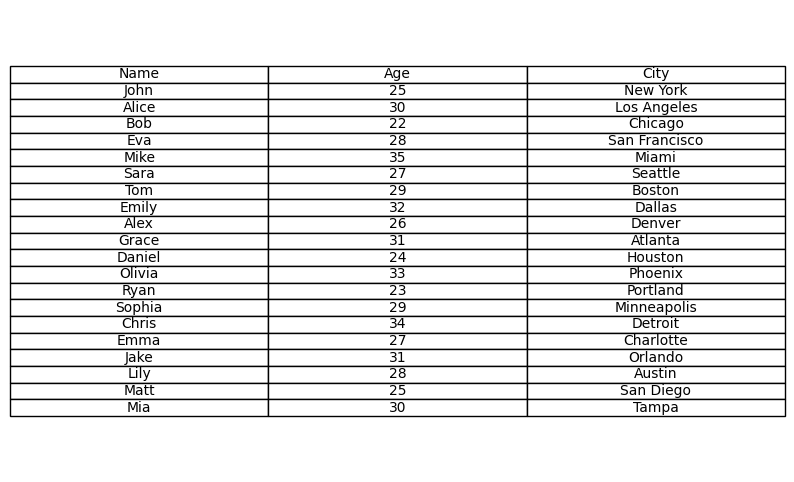

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import ipywidgets as widgets
from IPython.display import display

# Create an Upload button
upload_button = widgets.FileUpload(description="Upload CSV", multiple=False)
display(upload_button)

def handle_upload(change):
    uploaded_file = upload_button.value
    if uploaded_file:
        # Get the first uploaded file
        file_contents = uploaded_file[next(iter(uploaded_file))]

        # Convert bytes to a Pandas DataFrame
        df = pd.read_csv(BytesIO(file_contents['content']))

        # Plot table
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.axis('off')
        ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

        # Save image locally in Colab
        image_path = '/content/table_image.png'
        plt.savefig(image_path, bbox_inches='tight')
        plt.show()

# Attach the handle_upload function to the button
upload_button.observe(handle_upload, names='value')